SherlockML is an environment for collaborative data science in Python based on [Jupyter](http://jupyter.org).

Use this notebook to familiarize yourself with SherlockML and Jupyter.

# Machine Image Recognition

> ### The human visual system is one of the wonders of the world.

We carry in our heads a supercomputer. Our brain has billions of neurons, with even more connections between them, all tuned by evolution over hundreds of millions of years to be superbly adapted to understand the visual world.

> ### This machine learning system knows its Chihuahuas from its Pomeranians. Using pixels alone.

Over the past four years you have doubtlessly noticed quantum leaps in the quality of everyday technologies. Take your photo collection - you can now search or automatically organize collections of photos with no identifying tags. 

Think about that. To gather up dog pictures, the app must identify anything from a Chihuahua (or Pomeranian) to a German shepherd and not be tripped up if the pup is depicted upside down or partially obscured, at the right or the left of the frame, in fog or snow, sun or shade.

Artificial neural networks are the fundamental programmes making it possible for machines to replicate the performance of the human visual system. Here we give you access to a neural network, which has many millions of neurons, for you to put to the task of recognising any image. Your move.

_Text inspired by Nielsen ([2015](http://neuralnetworksanddeeplearning.com/chap1.html)) and Parloff ([2016](http://fortune.com/ai-artificial-intelligence-deep-machine-learning/))._

## Label custom images
<img src="dependencies/doc/images/UploadImage.png" alt="Upload directions" style="width: 350px; float: right; margin-right:10px;"/>

#### 1. Upload your JPEG photo in the same directory as this notebook
- Use the `Upload` button at the top-right corner of the Jupyter page. 

#### 2. Run the machine learning model by selecting `Cell` and `Run All`


#### 3. View results for different images using the drop-down menu

_We have provided photos of our beautiful office Chihuahuas (`toby.JPG` & `chibi.JPG`)_

## Code

### Imports

In [1]:
import os
from PIL import Image as pil_image
import subprocess as subp

In [2]:
import matplotlib.pyplot as plt;
%matplotlib inline

In [3]:
from IPython.display import display, Image
import ipywidgets as widgets

In [4]:
import sys
sys.path.append("./dependencies/modules")
import pretty_asi_plots

### Plot styles

In [5]:
# hide ticks and box surrounding plots 
pretty_asi_plots.set_parameters([('xtick.major.size', 0),
                               ('ytick.major.size', 0),
                               ('axes.edgecolor', 'white')])
# ASI  styles
pretty_asi_plots.set_asi_styles()

### Set up model and helper functions for classification and plotting

General helper functions.

In [6]:
def find_jpgs(directory='.', skip_list=['cropped_panda.jpg']):
    '''Find .jpg and .JPG images in the given directory.
    Return the file names of these images.'''
    contents = os.listdir(directory)
    
    for skip in skip_list:
        try:
            contents.remove(skip)
        except ValueError:
            pass
    
    return [x for x in contents if x.lower().endswith('.jpg')]

Classification functions.

In [7]:
def classify_jpg(jpg, directory='.'):
    '''Classify a given .jpg or .JPG image in given directory.'''
    image_file = os.path.join(directory, jpg)
    cmd = 'python ./dependencies/scripts/classify_image/classify_image.py --model_dir {} --image_file {}'.format(
        './dependencies/model', image_file)
    description = subp.check_output(cmd, shell=True)
    return description

def classify_jpgs(directory='.'):
    '''Classify all .jpg and .JPG
    images in given directory.'''
    
    jpgs = find_jpgs(directory)
    
    # if list empty
    if not jpgs:
        raise ValueError("No JPEGS found. Please upload at least one image.")
    
    descriptions = {}
    for jpg in jpgs: 
        descriptions[jpg] = classify_jpg(jpg, directory)
    return descriptions

def endlos(jpg, descriptions, directory='.', as_plot=True, max_image_width=500):
    '''Function to be placed in the interactive widget.'''
    if as_plot:
        predictions = reformat_results(descriptions[jpg])
        plot(predictions)
    else:
        print(descriptions[jpg])
    
    # get image size
    image_file = os.path.join(directory, jpg)
    image = pil_image.open(image_file)
    image_width, _ = image.size
    
    # constrain width
    if image_width > max_image_width:
        image_width = max_image_width
    
    return Image(image_file, width=image_width)

Format and plot functions.

In [8]:
def reformat_results(results):
    '''Transform string of results 
    returned by model into tuples of
    name as string, score as float'''
    top_5_predictions = results.split('\n')[:5]
    names = [prediction.partition('(')[0].rstrip(' ').capitalize() 
             for prediction in top_5_predictions]
    percent_scores = [float(prediction[-8:-1]) * 100. 
                      for prediction in top_5_predictions]
    return zip(names, percent_scores)

def plot(predictions):
    '''Plot barh chart of predictions'''
    names, scores = zip(*predictions[::-1])
    fig, ax = plt.subplots()
    n_bars = range(len(names))
    ax.barh(n_bars, scores)
    for i in n_bars:
        ax.annotate(names[i], xy=(scores[i]+1, i),
                    verticalalignment='bottom')
    ax.set_yticklabels(('{:.1f}%'.format(score) 
                        for score in scores),
                    verticalalignment='bottom')
    ax.set_xlim(0, 101)
    ax.set_xticks(range(25, 101, 25))
    ax.xaxis.set_ticklabels(())
    ax.xaxis.grid(True)
    plt.show()

### Run classification

In [9]:
# Classify all images in the given directory
descriptions = classify_jpgs()

Should take under a minute.

### Plot

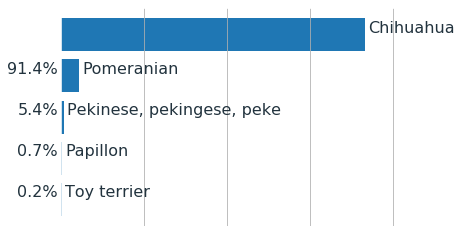

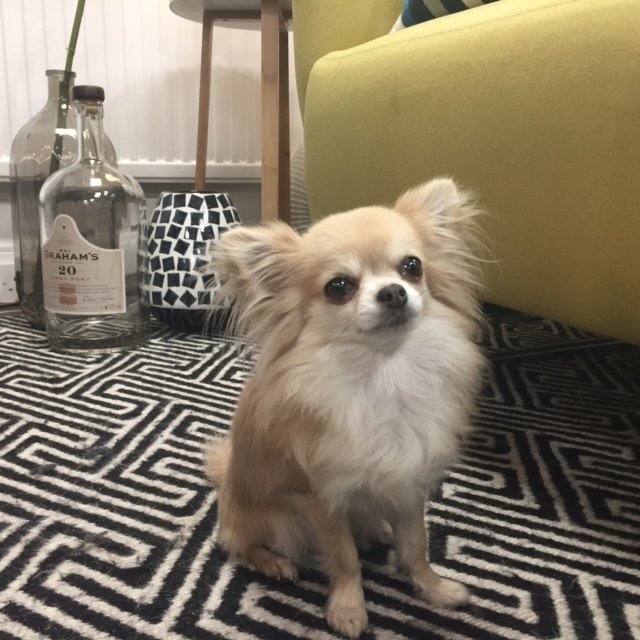

In [10]:
# Interactive widget
jpgs_tuple = tuple(descriptions.keys())
# suppress unwanted widget text output with semi-colon
widgets.interact(lambda x: endlos(x, descriptions), x=jpgs_tuple);

### Techinical details

__This demo__ classifies custom JPEG images using the pre-trained [Inception-v3](https://www.tensorflow.org/versions/r0.11/tutorials/image_recognition/index.html) model distributed with the [TensorFlow](https://www.tensorflow.org/) library. 

Inception-v3 is trained on [ILSVRC2014](http://image-net.org/challenges/LSVRC/2014/index#data), a variant of the ImageNet database consisting of 1.2 million images and 1,000 categories. It follows that this demo is capable of recognising 1,000 different types of objects as diverse as leopards, dishwashers and hats. 

__The Inception-v3 model__ is a special type of convolutional neural network, and contains about 25 million parameters. Even though this is a large number, Inception-v3 makes use of less parameters than competitor models such as AlexNet (60 million) and VGGNet (~135 million), while outperforming both. 

Inception-v3 correctly labels an image with its top prediction 78% of the time, whereas AlexNet (2012) and VGGNet (2014) achieve 54% and 70% top-prediction accuracy respectively ([Canziani et al.](https://arxiv.org/abs/1605.07678)). The top 5 predictions of Inception-v3 contained the correct label for the image 94% of the time when tested on the [ILSVRC2012](http://image-net.org/challenges/LSVRC/2012/) variant of the ImageNet dataset ([Szegedy et al.](https://arxiv.org/abs/1512.00567)).

It is therefore to be expected that this demo will feature the correct label for a given image at most 94% of the time. On an intuitive level, this is because user-provided images will only partly be comparable with those from the ImageNet database. 

__Training__ of the Inception-v3 model that is ditributed alongside TensorFlow was seemingly run on a powerful computer with 128GB of CPU RAM and 8 NVIDIA Tesla K40 GPU cards. Replicating this feat on a normal desktop machine is clearly impossible. But, while training Inception-v3 demands substantial computational resources, classification of images with this model is relatively 'simple'. It takes Inception-v3 around 5 billion multiply-add operations to process a single image. Don't be deceived by the apparent magnitude of this number, modern machines can nowadays complete the task in few seconds. 

Performance for images that depict humans has been [observed](https://github.com/Hvass-Labs/TensorFlow-Tutorials/blob/master/07_Inception_Model.ipynb) to still be a struggle for Inception-v3. Dogs, however... 

### Think you can beat the machine at recognising images? You can [test yourself here](http://cs.stanford.edu/people/karpathy/ilsvrc/)

In [11]:
import sherlockml.filesystem as sfs

In [12]:
sfs.ls()

['/input/', '/input/room_occupancy.csv', '/output/']